# I. Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (12, 6)})



/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('all.tsv', sep=' ', header=None, names= ["bank_account_status","duration_month", "credit_history", "purpose", "credit_amount","savings","employed_since","installment_percentage_of_income","personal_status_and_sex","gurantor","residence_since","property","age","other_credits","housing","nb_credit_at_bank","job_qualification","nb_pp_cater_for","telephone?","foreigner?","result"])
data.head()

,bank_account_status,duration_month,credit_history,purpose,credit_amount,savings,employed_since,installment_percentage_of_income,personal_status_and_sex,gurantor,...,property,age,other_credits,housing,nb_credit_at_bank,job_qualification,nb_pp_cater_for,telephone?,foreigner?,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
data_numeric = pd.read_csv('numeric.tsv', delim_whitespace=True, header=None)
data_numeric.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


### Hypotesis

Now that we imported the data, let's see the different insights and metrics we can extract from this 1000 borrowers.

We have 20 attributes describing the borrowers and an output variable stating if we are talking of a "Good" borrower or borrower who encountered a default.

Generally, credit scoring gives preference to:
- People with a stable situation and regular incomes
 - having children and being married are a sign of stability
- People with an history of paying back their credits
- People with disposable income to repay their debts
- People with assets (Home, bank account...) Vs people with debts

We will investigate what this dataset tells us about what we think scoring generally takes into account to make a decision on the attribution of a credit.

## Stability

For stability, we are investigating the different criteria (by order of assumed importance)
- Employed since
- Personal status and sex
- Nb of people to cater for
- residence since

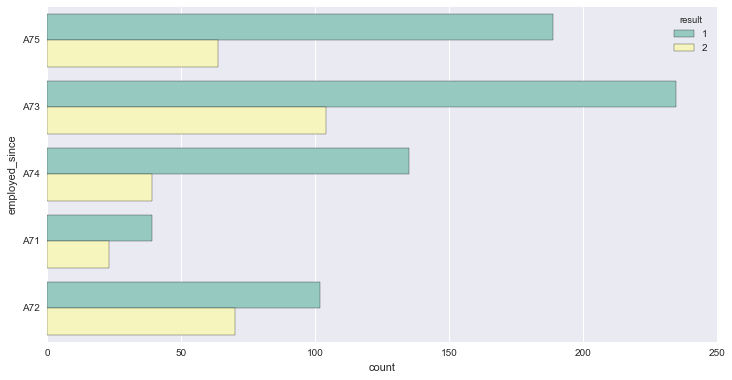

In [4]:
ax = sns.countplot(y="employed_since", hue="result", data=data, palette="Set3")

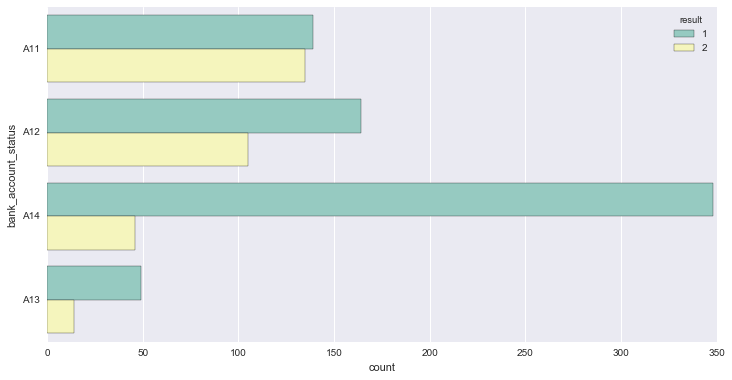

In [56]:
ax = sns.countplot(y="bank_account_status", hue="result", data=data, palette="Set3")

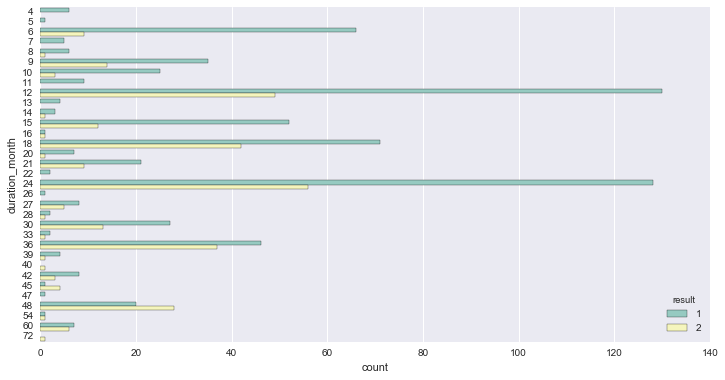

In [62]:
ax = sns.countplot(y="duration_month", hue="result", data=data.sort_values("duration_month"), palette="Set3")

# II. Preprocessing

In [6]:
X = data.ix[:,:-1]
y = data['result']

In [7]:
X.columns.tolist()

['bank_account_status',
 'duration_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'employed_since',
 'installment_percentage_of_income',
 'personal_status_and_sex',
 'gurantor',
 'residence_since',
 'property',
 'age',
 'other_credits',
 'housing',
 'nb_credit_at_bank',
 'job_qualification',
 'nb_pp_cater_for',
 'telephone?',
 'foreigner?']

In [8]:
def preprocess(X,convert_numeric=False):
    outX = pd.DataFrame(index=X.index)
    target_cols = ['credit_history','employed_since','gurantor','property','other_credits','job_qualification']
    for col in X.columns:
        if convert_numeric == True and col in target_cols:
            distinct_val = sorted(X[col].unique())
            new_col = X[col].replace(distinct_val,range(0,len(distinct_val)))
        elif X[col].dtype == object:
            values = X[col].value_counts()
            nb_values = len(values)
            if nb_values == 2:
                new_col = X[col].replace([values.index[0],values.index[1]],[0,1])
            else:
                new_col = pd.get_dummies(X[col],prefix=col)
        else:
            new_col = X[col]

        outX = outX.join(new_col)
    return outX
    

In [9]:
X_all = preprocess(X)
X_all_num = preprocess(X,convert_numeric=True)

## Feature selection

In [10]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
features = sel.fit_transform(X_all)
print X_all.shape
features


(1000, 59)


array([[ 1.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.]])

## Choosing the best model

### What does best mean ?
In this particular case we want to minimize the false positive.

The reason is that giving a credit to someone who is not paying costs a lot.

The credit company gets the interests in case reimboursements are met.

It **looses the capital** (+ the expected interests) when not reimboursed!

In [11]:
def roi(tp,fp):
    interest = (data['credit_amount'].mean() * 0.1 ) * tp
    loss = 0.95 * data['credit_amount'].mean() * fp
    roi = interest - loss
    return roi

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn import metrics
import time
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [13]:
def cost(y,y_pred):
    confusion_m = confusion_matrix(y,y_pred)
    cost_matrix = np.array([[0,1],[5,0]])
    return np.diag(np.transpose(cost_matrix).dot(confusion_m)).sum()
cost_estimate = make_scorer(cost,greater_is_better=False)

In [14]:
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

In [15]:
def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return cost(target.values, y_pred)

In [16]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "Cost estimation for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "Cost estimation for test set: {}".format(predict_labels(clf, X_test, y_test))

In [17]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y, test_size=0.2,random_state=15)

X_train_num, X_test_num, y_train_num, y_test_num = cross_validation.train_test_split(X_all_num, y, test_size=0.2,random_state=15)

clf = DecisionTreeClassifier(min_samples_split=35,max_depth=6 , max_features=22,random_state=18)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print confusion_matrix(y_test, y_pred)
print metrics.precision_score(y_test, y_pred)


print np.mean(cross_validation.cross_val_score(clf,X_train,y_train,scoring='precision',cv=10))

[[127  19]
 [ 30  24]]
0.808917197452
0.767804620327


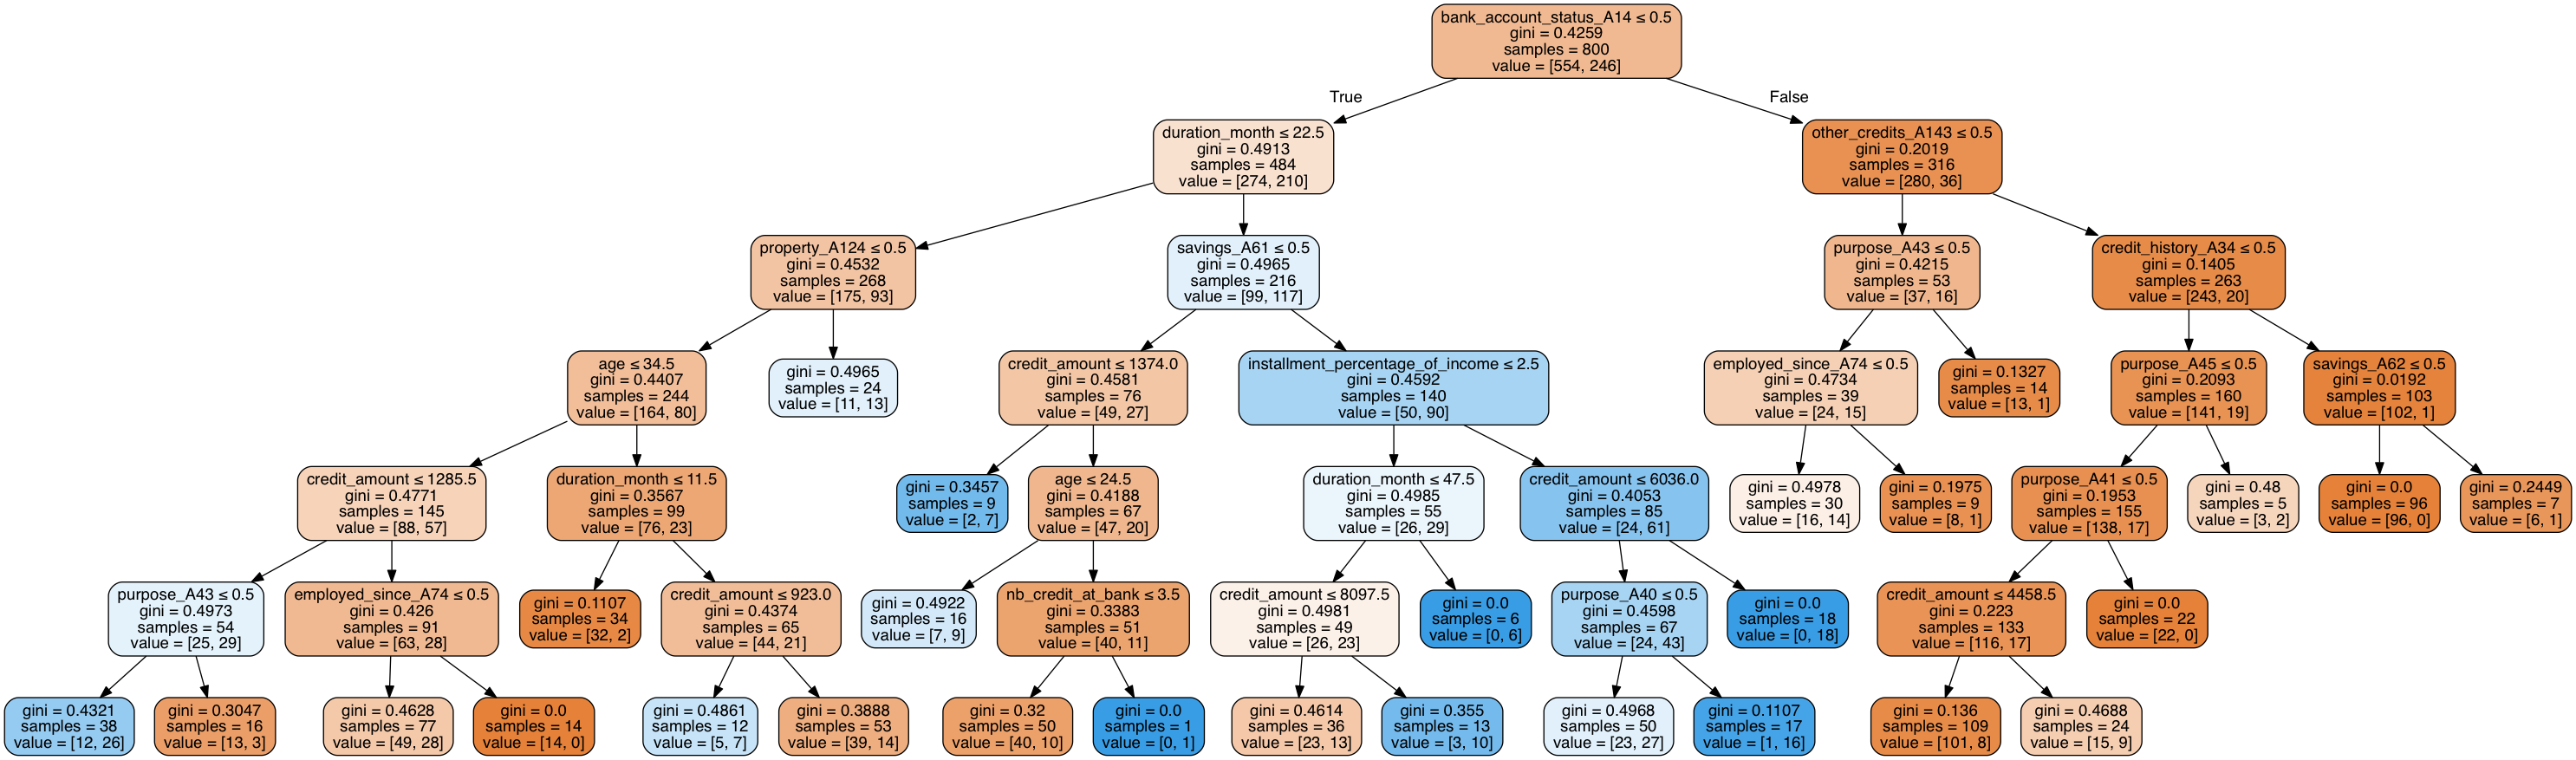

In [18]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=X_all.columns.tolist(),  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [19]:
from sklearn.grid_search import GridSearchCV
parameters = {'max_depth': range(6,9,1),
             'min_samples_split': range(5,61,5),
             'max_features' : range(15,26,2)}
tree = DecisionTreeClassifier()

tree_model = GridSearchCV(tree,parameters, scoring=cost_estimate,cv=5)
tree_model.fit(X_train, y_train)
print tree_model.best_params_
print tree_model.best_score_

{'max_features': 21, 'min_samples_split': 20, 'max_depth': 8}
-138.5925


In [20]:

parameters = {'max_depth': range(6,9,1),
             'min_samples_split': range(5,61,5),
             'max_features' : range(22,26,1)}

rf = RandomForestClassifier(n_estimators=20,n_jobs=-1)
grid_search =  RandomizedSearchCV(rf,parameters, scoring=cost_estimate,cv=5)
grid_search.fit(X_train, y_train)
print grid_search.best_params_
print grid_search.best_score_


{'min_samples_split': 25, 'max_features': 24, 'max_depth': 6}
-156.595


In [21]:
svm = SVC()
scaler = StandardScaler()
estimators = Pipeline([
    ('scale', scaler), 
#   ('pca', pca),
    ('classifier',svm)
])

parameters = [{
#       'pca__n_components':[10,43,45,50,55,59],
               'classifier__gamma':[0.1,0.007],
               'classifier__C': [20],
              }]
svm_basic = GridSearchCV(estimators,parameters,scoring=cost_estimate,verbose=1,cv=5)
svm_basic.fit(X_train,y_train)
scores = svm_basic.grid_scores_
sorted(scores, key= lambda x: np.mean(x[2]),reverse=True )[:10]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished


[mean: -135.56000, std: 14.92113, params: {'classifier__gamma': 0.007, 'classifier__C': 20},
 mean: -136.36500, std: 19.30389, params: {'classifier__gamma': 0.007, 'classifier__C': 10},
 mean: -137.58375, std: 17.61363, params: {'classifier__gamma': 0.007, 'classifier__C': 5},
 mean: -233.01500, std: 10.15874, params: {'classifier__gamma': 0.1, 'classifier__C': 5},
 mean: -233.01500, std: 10.15874, params: {'classifier__gamma': 0.1, 'classifier__C': 10},
 mean: -233.01500, std: 10.15874, params: {'classifier__gamma': 0.1, 'classifier__C': 20}]

In [22]:


x_tree = ExtraTreesClassifier(n_estimators=50,random_state=13,n_jobs=-1)
svm = SVC()
scaler = StandardScaler()

estimators = Pipeline([
    ('sel',SelectFromModel(x_tree)),
    ('scale', scaler),
    ('classifier',svm)
])

parameters = {'sel__estimator__max_depth':range(5,8,1),
                'sel__estimator__min_samples_split': range(40,61,5),
                'sel__estimator__max_features' : range(20,40,1),
                'sel__estimator__criterion' : ['gini'],
                'sel__estimator__max_leaf_nodes': range(30,40,2),
                'sel__threshold':['median','0.4*median','mean'],
               'classifier__gamma':(0.01,0.009,0.008),
               'classifier__C': (10,15,20,25)}
svm_model = RandomizedSearchCV(estimators,parameters,scoring=cost_estimate,verbose=1,n_iter=50,cv=5)
svm_model.fit(X_train,y_train)
scores = svm_model.grid_scores_
sorted(scores, key= lambda x: np.mean(x[2]),reverse=True )[:10]



[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   43.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  2.9min


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.7min finished


[mean: -125.77875, std: 14.87817, params: {'sel__estimator__min_samples_split': 40, 'sel__estimator__max_depth': 6, 'sel__estimator__criterion': 'gini', 'sel__estimator__max_features': 32, 'classifier__C': 15, 'classifier__gamma': 0.009, 'sel__estimator__max_leaf_nodes': 34, 'sel__threshold': '0.4*median'},
 mean: -132.96000, std: 17.65220, params: {'sel__estimator__min_samples_split': 40, 'sel__estimator__max_depth': 6, 'sel__estimator__criterion': 'gini', 'sel__estimator__max_features': 20, 'classifier__C': 20, 'classifier__gamma': 0.009, 'sel__estimator__max_leaf_nodes': 36, 'sel__threshold': '0.4*median'},
 mean: -134.78375, std: 18.05990, params: {'sel__estimator__min_samples_split': 50, 'sel__estimator__max_depth': 7, 'sel__estimator__criterion': 'gini', 'sel__estimator__max_features': 23, 'classifier__C': 20, 'classifier__gamma': 0.009, 'sel__estimator__max_leaf_nodes': 38, 'sel__threshold': '0.4*median'},
 mean: -135.17125, std: 14.46928, params: {'sel__estimator__min_samples_s

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

NB = GaussianNB()

x_tree = DecisionTreeClassifier(random_state=13)


estimators = Pipeline([
    ('sel',SelectFromModel(x_tree)),
    ('classifier',NB)
])

parameters = {
                'sel__estimator__max_depth':range(3,10,1),
                'sel__estimator__min_samples_split': range(15,30,2),
                'sel__estimator__max_features' : range(15,25,1),
                'sel__estimator__criterion' : ['gini','entropy'],
                'sel__estimator__max_leaf_nodes': range(20,100,1),
                'sel__threshold':['median','0.5*median','mean','1.1*mean','0.9*mean','1.05*mean','1.2*mean']
              }
nb_model = RandomizedSearchCV(estimators,parameters,scoring=cost_estimate,verbose=1,n_jobs=-1,n_iter=200,cv=5)
nb_model.fit(X_train,y_train)
scores = nb_model.grid_scores_
sorted(scores, key= lambda x: np.mean(x[2]),reverse=True )[:10]

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


[mean: -118.77125, std: 8.25591, params: {'sel__estimator__min_samples_split': 19, 'sel__estimator__max_depth': 7, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 15, 'sel__estimator__max_leaf_nodes': 43, 'sel__threshold': 'median'},
 mean: -120.41875, std: 15.65375, params: {'sel__estimator__min_samples_split': 17, 'sel__estimator__max_depth': 9, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 19, 'sel__estimator__max_leaf_nodes': 88, 'sel__threshold': 'mean'},
 mean: -120.45750, std: 18.41304, params: {'sel__estimator__min_samples_split': 27, 'sel__estimator__max_depth': 9, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 19, 'sel__estimator__max_leaf_nodes': 56, 'sel__threshold': 'mean'},
 mean: -122.01500, std: 8.00000, params: {'sel__estimator__min_samples_split': 29, 'sel__estimator__max_depth': 8, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 19, 'sel__estimator__max_leaf_nodes': 97,

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
              'max_depth':[2,3,4],
                'min_samples_split':[2,8,20],
                'min_samples_leaf': [26,28,30,32,34],
                'learning_rate':[0.1,0.5,0.01]
             }

GB =  GradientBoostingClassifier()
gb_model = RandomizedSearchCV(GB,parameters, scoring=cost_estimate,n_iter=30,cv=5)
gb_model.fit(X_train, y_train)
print gb_model.best_params_
print gb_model.best_score_
scores = gb_model.grid_scores_

{'min_samples_split': 20, 'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 26}
-132.99375


In [25]:
sorted(scores, key= lambda x: np.mean(x[2]),reverse=True )[:10]

[mean: -132.99375, std: 18.81489, params: {'min_samples_split': 20, 'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 26},
 mean: -132.99375, std: 18.81489, params: {'min_samples_split': 2, 'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 26},
 mean: -134.41250, std: 11.74053, params: {'min_samples_split': 8, 'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 28},
 mean: -135.21250, std: 12.68700, params: {'min_samples_split': 8, 'learning_rate': 0.5, 'max_depth': 3, 'min_samples_leaf': 34},
 mean: -136.22000, std: 16.80952, params: {'min_samples_split': 8, 'learning_rate': 0.5, 'max_depth': 3, 'min_samples_leaf': 28},
 mean: -136.40000, std: 11.41227, params: {'min_samples_split': 8, 'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 32},
 mean: -137.79500, std: 18.28004, params: {'min_samples_split': 2, 'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 34},
 mean: -137.79500, std: 18.28004, params: {'min_samples_split': 20, 'learning_rate': 0.5,

In [26]:

probas = nb_model.predict_proba(X_test)

len(probas[:,0][(probas[:,0] < .63) & (probas[:,0] > .5)])

8

In [27]:

def chooseThreshold(model,new_threshold):
    prediction = []
    probas = model.predict_proba(X_test)
    for proba in probas:
        if proba[0] > new_threshold:
            prediction.append(1)
        else:
            prediction.append(2)
    return prediction
    
    

In [28]:
GB_predictions = gb_model.predict(X_test)
svm_predictions = svm_basic.predict(X_test)
svm_predictions_2 = svm_model.predict(X_test)
NB_predictions = nb_model.predict(X_test) 

print "Gradient Boosting"
print precision_score(y_test,GB_predictions)
print confusion_matrix(y_test,GB_predictions)
print "SVM with Standard Scaler"
print precision_score(y_test,svm_predictions)
print confusion_matrix(y_test,svm_predictions)
print "SVM 2 "
print precision_score(y_test,svm_predictions_2)
print confusion_matrix(y_test,svm_predictions_2)
print "Naive Bayes 2"
print precision_score(y_test,NB_predictions)
print confusion_matrix(y_test,NB_predictions)

Gradient Boosting
0.814814814815
[[132  14]
 [ 30  24]]
SVM with Standard Scaler
0.816993464052
[[125  21]
 [ 28  26]]
SVM 2 
0.796178343949
[[125  21]
 [ 32  22]]
Naive Bayes 2
0.847328244275
[[111  35]
 [ 20  34]]


In [29]:
NB_alone = GaussianNB()
sizes = range(200,801,200)

for i,v in enumerate(sizes):
    train_predict(NB_alone,X_train[:v],y_train[:v],X_test,y_test)
    
for i,v in enumerate(sizes):
    train_predict(tree_model,X_train[:v],y_train[:v],X_test,y_test)


------------------------------------------
Training set size: 200
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Cost estimation for training set: 112
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.000
Cost estimation for test set: 138
------------------------------------------
Training set size: 400
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Cost estimation for training set: 259
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Cost estimation for test set: 134
------------------------------------------
Training set size: 600
Training GaussianNB...
Done!
Training time (secs): 0.001
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Cost estimation for training set: 413
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
Cost 

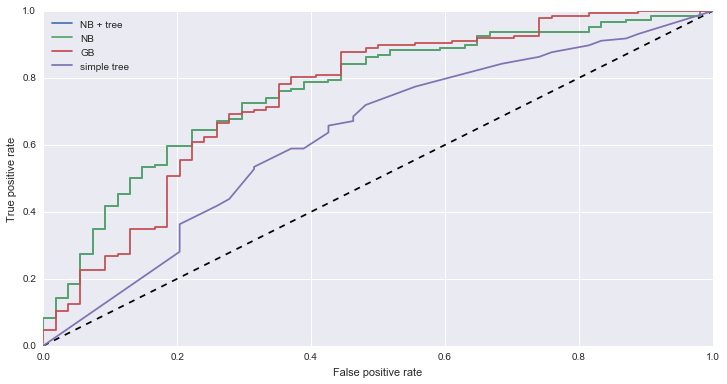

In [30]:
fpr_alone, tpr_alone, thresholds_alone = metrics.roc_curve(y_test, NB_alone.predict_proba(X_test)[:,0],pos_label=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_model.predict_proba(X_test)[:,0],pos_label=1)
fpr_gb, tpr_gb,t_gb =  metrics.roc_curve(y_test,gb_model.predict_proba(X_test)[:,0],pos_label=1)
fpr_tree, tpr_tree,t_tree =  metrics.roc_curve(y_test,tree_model.predict_proba(X_test)[:,0],pos_label=1)


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='NB + tree')
plt.plot(fpr_alone,tpr_alone,label='NB')
plt.plot(fpr_gb,tpr_gb,label='GB')
plt.plot(fpr_tree,tpr_tree,label='simple tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best');

In [31]:
print confusion_matrix(y_test,chooseThreshold(NB_alone,0.5))
print roi(confusion_matrix(y_test,chooseThreshold(NB_alone,0.5))[0,0],confusion_matrix(y_test,chooseThreshold(NB_alone,0.5))[1,0])
print confusion_matrix(y_test,chooseThreshold(gb_model,0.98))
print roi(confusion_matrix(y_test,chooseThreshold(gb_model,0.98))[0,0],confusion_matrix(y_test,chooseThreshold(gb_model,0.98))[1,0])


[[111  35]
 [ 20  34]]
-25842.9382
[[ 19 127]
 [  3  51]]
-3107.6951


## Ordinal Values turned to numeric attributes

In [32]:
NB = GaussianNB()

x_tree = DecisionTreeClassifier(random_state=13)


estimators = Pipeline([
    ('sel',SelectFromModel(x_tree)),
    ('classifier',NB)
])

parameters = {
                'sel__estimator__max_depth':range(3,10,1),
                'sel__estimator__min_samples_split': range(15,30,2),
                'sel__estimator__max_features' : range(15,25,1),
                'sel__estimator__criterion' : ['gini','entropy'],
                'sel__estimator__max_leaf_nodes': range(20,100,1),
                'sel__threshold':['median','0.5*median','mean','1.1*mean','0.9*mean','1.05*mean','1.2*mean']
              }
nb_model_num = RandomizedSearchCV(estimators,parameters,scoring=cost_estimate,verbose=1,n_jobs=-1,n_iter=200,cv=5)
nb_model_num.fit(X_train_num,y_train_num)
scores = nb_model_num.grid_scores_
sorted(scores, key= lambda x: np.mean(x[2]),reverse=True )[:10]

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.8s finished


[mean: -104.80750, std: 6.30555, params: {'sel__estimator__min_samples_split': 15, 'sel__estimator__max_depth': 9, 'sel__estimator__criterion': 'gini', 'sel__estimator__max_features': 18, 'sel__estimator__max_leaf_nodes': 24, 'sel__threshold': 'median'},
 mean: -104.80750, std: 6.30555, params: {'sel__estimator__min_samples_split': 21, 'sel__estimator__max_depth': 4, 'sel__estimator__criterion': 'gini', 'sel__estimator__max_features': 19, 'sel__estimator__max_leaf_nodes': 36, 'sel__threshold': '0.5*median'},
 mean: -104.80750, std: 6.30555, params: {'sel__estimator__min_samples_split': 29, 'sel__estimator__max_depth': 5, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 18, 'sel__estimator__max_leaf_nodes': 20, 'sel__threshold': '0.5*median'},
 mean: -104.80750, std: 6.30555, params: {'sel__estimator__min_samples_split': 27, 'sel__estimator__max_depth': 3, 'sel__estimator__criterion': 'entropy', 'sel__estimator__max_features': 24, 'sel__estimator__max_leaf_nodes':

In [33]:
NB_predictions = nb_model_num.predict(X_test_num) 

print "Naive Bayes 2"
print precision_score(y_test_num,NB_predictions)
print confusion_matrix(y_test_num,NB_predictions)
print cost(y_test,NB_predictions)

Naive Bayes 2
0.859504132231
[[104  42]
 [ 17  37]]
127


In [36]:
features = nb_model_num.best_estimator_.steps[0][1].estimator.fit(X_train_num,y_train_num).feature_importances_

for i,f in enumerate(features):
    if f > 0.05:
        print "{0} has {1} importance".format(X_all_num.columns[i],f)


bank_account_status_A11 has 0.178509056012 importance
bank_account_status_A14 has 0.177926192764 importance
duration_month has 0.153049248561 importance
credit_history has 0.0691879454116 importance
credit_amount has 0.0953967453933 importance
savings_A65 has 0.0595451450269 importance
employed_since has 0.0718910049882 importance
